In [2]:
%matplotlib inline
import json
import matplotlib
import numpy
import fnmatch
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.ticker import MaxNLocator
matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'Times'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 8
# matplotlib.rcParams['figure.figsize']= [3.125, 1.93]  # Golden ratio
# matplotlib.rcParams['figure.figsize']= [3.125, 1.56]  # Golden ratio
# figure.figsize: 3.125, 1.56  # Squash for more space
# matplotlib.rcParams['legend.fontsize']= 6
# matplotlib.rcParams['legend.fancybox']= True
# matplotlib.rcParams['axes.linewidth']= 0.5

# matplotlib.rcParams['patch.linewidth']= 0.5
# matplotlib.rcParams['lines.linewidth']= 2
# matplotlib.rcParams['grid.linewidth']= 0.1
# matplotlib.rcParams['xtick.major.width']= 0.25
# matplotlib.rcParams['xtick.minor.width']= 0.25
# matplotlib.rcParams['ytick.major.width']= 0.25
# matplotlib.rcParams['ytick.minor.width']= 0.25
# matplotlib.rcParams['legend.numpoints']= 1

import pickle
color_n=['k','c','b','r','m','k','g']
markers=['o','*','^','s','*','o','d','o','*','^','1','4']
linestyles=[ '-',':','--','-.','--',':','-','-.', '--',':']

/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [231]:
data = {1: {0: {2: 572040.0, 3: 77.0, 4: 479.0, 6: 77.0},
               1: {2: 47937.0, 3: 4.0, 4: 77.0, 6: 4.0},
               2: {2: 56695698.0, 3: 1318314.0, 4: 7323.0, 6: 2139.0},
               3: {2: 56695698.0, 3: 1235586.0, 4: 348.0, 6: 107.0},
               4: {2: 7972178.0, 3: 133.0, 4: 1537.0, 6: 133.0}},
           2: {0: {2: 619977.0, 3: 81.0, 4: 556.0, 6: 81.0},
               1: {2: 57267738.0, 3: 1318391.0, 4: 7802.0, 6: 2216.0},
               2: {2: 57267738.0, 3: 1235663.0, 4: 827.0, 6: 185.0},
               3: {2: 8544218.0, 3: 210.0, 4: 2016.0, 6: 210.0},
               4: {2: 56743635.0, 3: 1318318.0, 4: 7400.0, 6: 2143.0},
               5: {2: 56743635.0, 3: 1235590.0, 4: 425.0, 6: 112.0},
               6: {2: 8020115.0, 3: 137.0, 4: 1614.0, 6: 137.0},
               7: {2: 113391396.0, 3: 2553900.0, 4: 7671.0, 6: 2246.0},
               8: {2: 64667876.0, 3: 1318447.0, 4: 8860.0, 6: 2272.0},
               9: {2: 64667876.0, 3: 1235719.0, 4: 1885.0, 6: 240.0}},
           3: {0: {2: 57315675.0, 3: 1318395.0, 4: 7879.0, 6: 2220.0},
               1: {2: 57315675.0, 3: 1235667.0, 4: 904.0, 6: 188.0},
               2: {2: 8592155.0, 3: 214.0, 4: 2093.0, 6: 214.0},
               3: {2: 113963436.0, 3: 2553977.0, 4: 8150.0, 6: 2323.0},
               4: {2: 65239916.0, 3: 1318524.0, 4: 9339.0, 6: 2349.0},
               5: {2: 65239916.0, 3: 1235796.0, 4: 2364.0, 6: 318.0},
               6: {2: 113439333.0, 3: 2553904.0, 4: 7748.0, 6: 2250.0},
               7: {2: 64715813.0, 3: 1318451.0, 4: 8937.0, 6: 2276.0},
               8: {2: 121363574.0, 3: 2554033.0, 4: 9208.0, 6: 2380.0}},
           4: {0: {2: 114011373.0, 3: 2553981.0, 4: 314220.0, 6: 2327.0},
               1: {2: 65287853.0, 3: 1318528.0, 4: 12575.0, 6: 2353.0},
               2: {2: 65287853.0, 3: 1235800.0, 4: 5600.0, 6: 322.0},
               3: {2: 121935614.0, 3: 2554110.0, 4: 1290998.0, 6: 2470.0},
               4: {2: 121411511.0, 3: 2554037.0, 4: 149950.0, 6: 2383.0}},
           5: {0: {2: 121983551.0, 3: 2554114.0, 4: 1274557.0, 6: 2610.0}}
           }

In [232]:
def draw_plots(data, modes):
    f, (ax) = plt.subplots(1)
    for mode in modes:
        x = range(1, 1+len(data[mode]))
        y = data[mode]
        print x, y
        plt.plot(x, y, marker = markers[mode], 
                 linestyle = linestyles[mode], 
                 label=modes[mode],
                )
   
    plt.xlabel('Queries')
    plt.ylabel('Tuples')
    #ax.set_xlim(0, 1.01)
    ax.grid(True)
    pl.locator_params(nticks=5)
    ax.locator_params(nbins=5)
    ax.set_xlim(xmax=5.25)
    ax.set_xlim(xmin=0.75)
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=4, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/key_result.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

{1: [62874535, 125749070, 188623605, 251498140, 314372675], 2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 3: [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0], 6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]}
[1, 2, 3, 4, 5] [62874535, 125749070, 188623605, 251498140, 314372675]
[1, 2, 3, 4, 5] [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0]
[1, 2, 3, 4, 5] [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0]
[1, 2, 3, 4, 5] [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]


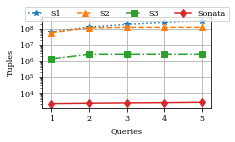

In [233]:
modes = {1: "S1", 2:"S2", 3: "S3", 6: "Sonata"}

def get_plot_data(data_in):
    n_queries = data_in.keys()
    n_queries.sort()
    out = {}
    for mode in modes:
        out[mode] = []
        
        if mode == 1:
            out[mode] = [62874535*x for x in n_queries]
        else:
            for n in n_queries:
                tmp = max([data_in[n][x][mode] for x in data_in[n].keys()])
                out[mode].append(tmp)
            
    return out

plot_data = get_plot_data(data)
print plot_data
# plot_data = {1: [62874535, 125749070, 188623605, 251498140, 314372675], 
#              2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 
#              3: [56695698.0, 57267738.0, 113963436.0, 113963440.0, 114238009.0], 
#              6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]
#             }
draw_plots(plot_data, modes)


Refinement Level Analysis

{3: [0.9251517616872145, 0.5337004818824708, 0.2797004401610447, 0.09489538352420886, 0.054592485971170494, 0.024281869954315038, 0.023656048563739908], 5: [1.0, 0.999178879498053, 0.9630456617713746, 0.793235423259098, 0.5624583897000439, 0.4441287943928303, 0.29441200282956215]}
[1, 2, 3, 4, 5, 6, 7] [0.9251517616872145, 0.5337004818824708, 0.2797004401610447, 0.09489538352420886, 0.054592485971170494, 0.024281869954315038, 0.023656048563739908]
[1, 2, 3, 4, 5, 6, 7] [1.0, 0.999178879498053, 0.9630456617713746, 0.793235423259098, 0.5624583897000439, 0.4441287943928303, 0.29441200282956215]


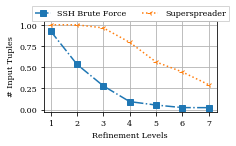

In [234]:
line_ids_2_labels = {1: "A1", 2:"A2", 3: "SSH Brute Force", 4: "A4", 5:"Superspreader", 6: "A6", 7: "A7"}

data = {1: {4: 1.0, 8: 0.9974497903614583, 12: 0.9686547108880681, 16: 0.9094857497297917, 20: 0.8368696320175808, 24: 0.7701348626040058, 28: 0.6350089127823013}, 
        2: {4: 0.9852580239144115, 8: 0.9201664219285365, 12: 0.8628837144255647, 16: 0.7959897909237116, 20: 0.4712957135864625, 24: 0.3800258723166212, 28: 0.28688203622124325}, 
        3: {4: 0.9251517616872145, 8: 0.5337004818824708, 12: 0.2797004401610447, 16: 0.09489538352420886, 20: 0.054592485971170494, 24: 0.024281869954315038, 28: 0.023656048563739908}, 
        4: {4: 1.0, 8: 0.9676029417982482, 12: 0.8651884553967203, 16: 0.7008367996247029, 20: 0.5984903554622918, 24: 0.5266435606993733, 28: 0.3650602585253607}, 
        5: {4: 1.0, 8: 0.999178879498053, 12: 0.9630456617713746, 16: 0.793235423259098, 20: 0.5624583897000439, 24: 0.4441287943928303, 28: 0.29441200282956215}, 
        6: {4: 0.8949686623489493, 8: 0.6249752670828747, 12: 0.3811785155198195, 16: 0.2732586165532348, 20: 0.23687760224770493, 24: 0.2220426142385618, 28: 0.14603619484497748}, 
        7: {4: 0.9809720756360433, 8: 0.9951469974704529, 12: 0.8406944752111656, 16: 0.6864953341483344, 20: 0.4927378691243472, 24: 0.43543470805594153, 28: 0.12852021116437692}}

apps = [3,5]
#apps = range(1,8)
def get_plot_data(data_in):
    line_ids = data_in.keys()
    line_ids.sort()
    out = {}
    
    
    for line_id in line_ids:
        if line_id in apps:
            keys = data[line_id].keys()
            keys.sort()
            out[line_id] = []
            for k in keys:
                out[line_id].append(data_in[line_id][k])
    print out
            
    return out

def draw_plots(data, modes):
    f, (ax) = plt.subplots(1)
    for mode in data.keys():
        x = range(1, 1+len(data[mode]))
        y = data[mode]
        print x, y
        plt.plot(x, y, marker = markers[mode], 
                 linestyle = linestyles[mode], 
                 label=line_ids_2_labels[mode],
                )
   
    plt.xlabel('Refinement Levels')
    plt.ylabel('# Input Tuples')
    #ax.set_xlim(0, 1.01)
    ax.grid(True)
    #pl.locator_params(nticks=5)
    #ax.locator_params(nbins=5)
    #ax.set_xlim(xmax=5.25)
    ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=4, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/refinement_level_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data)
draw_plots(plot_data, modes)

## Single-Query Analysis

{2: [62874534.0, 633264.0, 82.0, 527.0, 82.0], 3: [62874534.0, 60259.0, 5.0, 88.0, 5.0], 5: [62874534.0, 62874534.0, 1399803.0, 622.0, 166.0], 6: [62874534.0, 62874534.0, 1312455.0, 349.0, 115.0], 7: [62874534.0, 8808688.0, 298635.0, 243.0, 24.0], 9: [188623602.0, 41151274.0, 40655965.0, 20549.0, 16843.0], 10: [125749068.0, 572066.0, 76756.0, 3531.0, 3531.0], 12: [125749068.0, 96734030.0, 49506082.0, 1680.0, 1680.0]}
[0, 1, 2, 3, 4, 5, 6, 7] [2, 3, 5, 6, 7, 9, 10, 12] 8
[12.5, 42.5, 72.5, 102.5, 132.5, 162.5, 192.5, 222.5]
1 [5, 35, 65, 95, 125, 155, 185, 215] [62874534.0, 62874534.0, 62874534.0, 62874534.0, 62874534.0, 188623602.0, 125749068.0, 125749068.0]
2 [10, 40, 70, 100, 130, 160, 190, 220] [633264.0, 60259.0, 62874534.0, 62874534.0, 8808688.0, 41151274.0, 572066.0, 96734030.0]
3 [15, 45, 75, 105, 135, 165, 195, 225] [82.0, 5.0, 1399803.0, 1312455.0, 298635.0, 40655965.0, 76756.0, 49506082.0]
4 [20, 50, 80, 110, 140, 170, 200, 230] [527.0, 88.0, 622.0, 349.0, 243.0, 20549.0, 353

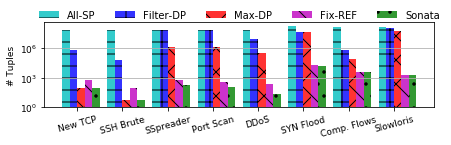

In [11]:
# data = {
#         #1: {2: 40072784.0, 3: 40072784.0, 4: 285222194.0, 6: 40072784.0}, 
#         2: {2: 572040.0, 3: 572040.0, 4: 479.0, 6: 155.0}, 
#         3: {2: 47937.0, 3: 4.0, 4: 3236.0, 6: 4.0}, 
#         #4: {2: 48367015.0, 3: 48367015.0, 4: 291354307.0, 6: 48367015.0}, 
#         5: {2: 56695698.0, 3: 56695698.0, 4: 5256073.0, 6: 1546758.0}, 
#         6: {2: 56695698.0, 3: 56695698.0, 4: 2652815.0, 6: 150.0}, 
#         7: {2: 7972178.0, 3: 274569.0, 4: 1103383.0000000005, 6: 695.0}
#        }

# data = {
#         2: {1: 56695698.0, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
#         3: {1: 56695698.0, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1032.0}, 
#         5: {1: 56695698.0, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
#         6: {1: 56695698.0, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2523.0}, 
#         7: {1: 56695698.0, 2: 7972178.0, 3: 128380.0, 4: 12208.0, 6: 12219.0}, 
#         9: {1: 3*56695698.0, 2: 41151274.0, 3: 508290.0, 4: 70517.0, 6: 57419.0}, 
#         10: {1: 2*56695698.0, 2: 572066.0, 3: 76757.0, 4: 3531.0, 6: 3531.0}, 
#         11: {1: 2*56695698.0, 2: 15944356.0, 3: 15944356.0, 4: 187920.0, 6: 186536.0}, 
#         12: {1: 2*56695698.0, 2: 96734030.0, 3: 49506082.0, 4: 9468.999999996158, 6: 9454.0}}

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 384181.0, 6: 4299.0}, 3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 5374.0, 6: 1108.0}, 5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 46327563.0, 6: 199307.0}, 6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 23005763.0, 6: 12719.0}, 7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 5472637.0, 6: 27630.0}, 9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 2679478.0, 6: 103617.0}, 10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 384319.0, 6: 4390.0}, 11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 7615165.0, 6: 186577.0}, 12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 187931945.0, 6: 42976.0}}
 
# Most realistic case
data = {
        2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
        3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1018.0}, 
        5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
        6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2823.0}, 
        7: {1: 56695698, 2: 7972178.0, 3: 274569.0, 4: 12208.0, 6: 12089.0}, 
        9: {1: 170087094, 2: 41151274.0, 3: 40655965.0, 4: 70517.0, 6: 56799.0}, 
        10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 3531.0, 6: 3531.0}, 
        11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 15961640.0, 6: 15944356.0}, 
        12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 9469.0, 6: 9454.0}
       }

"""
sigma_max = 12
width_max = 4
bits_max_stage = 8 * 1000000
bits_max_register = 4 * 1000000
ref_levels = [0, 4, 8, 12, 16, 20, 24, 28, 32]
"""

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
        3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1018.0}, 
        5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
        6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2823.0}, 
        7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 12208.0, 6: 12089.0}, 
        9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 70517.0, 6: 57419.0}, 
        10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 3531.0, 6: 3531.0000000000005}, 
        11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 187920.0, 6: 186536.0}, 
        12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 9469.0, 6: 9454.0}
       }

"""
sigma_max = 12
width_max = 4
bits_max_stage = 16 * 1000000
bits_max_register = 8 * 1000000
"""

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 384181.0, 6: 4299.0}, 3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 5374.0, 6: 1187.0}, 5: {1: 56695698, 2: 56695698.0, 3: 668491.0, 4: 46327563.0, 6: 199307.0}, 6: {1: 56695698, 2: 56695698.0, 3: 668491.0, 4: 23005763.0, 6: 12719.0}, 7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 5472637.0, 6: 27630.0}, 9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 2679478.0, 6: 103617.0}, 10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 384319.0, 6: 4325.0}, 11: {1: 113391396, 2: 15944356.0, 3: 279288.0, 4: 7615165.0, 6: 186372.0}, 12: {1: 113391396, 2: 96734030.0, 3: 521674.0, 4: 187931945.0, 6: 13732.0}}
"""
sigma_max = 8
width_max = 1
bits_max_stage = 32 * 1000000
bits_max_register = 32 * 1000000
"""

data = {2: {1: [62874534], 2: [633264], 3: [82], 4: [527], 6: [82]}, 
        3: {1: [62874534], 2: [60259], 3: [5], 4: [1945], 6: [5]}, 
        5: {1: [62874534], 2: [62874534], 3: [1399803], 4: [2301229], 6: [137]}, 
        6: {1: [62874534], 2: [62874534], 3: [1312455], 4: [1810814], 6: [111]}, 
        7: {1: [62874534], 2: [8808688], 3: [15], 4: [469408], 6: [15]}, 
        9: {1: [188623602], 2: [41151274], 3: [40655965], 4: [241702], 6: [17533]}, 
        10: {1: [125749068], 2: [572066], 3: [76756], 4: [3561], 6: [3561]}, 
        11: {1: [125749068], 2: [15944356], 3: [15944356], 4: [352140], 6: [186169]}, 
        12: {1: [125749068], 2: [96734030], 3: [49506082], 4: [56079611], 6: [9083]}}
"""
sigma_max = 12
width_max = 1
bits_max_stage = 8 * 1000000
bits_max_register = 0.75 * bits_max_stage
"""

data = {2: {1: [62874534], 2: [633264], 3: [82], 4: [527], 6: [82]}, 
        3: {1: [62874534], 2: [60259], 3: [5], 4: [88], 6: [5]}, 
        5: {1: [62874534], 2: [62874534], 3: [1399803], 4: [621], 6: [137]}, 
        6: {1: [62874534], 2: [62874534], 3: [1312455], 4: [349], 6: [111]}, 
        7: {1: [62874534], 2: [8808688], 3: [15], 4: [243], 6: [15]}, 
        9: {1: [188623602], 2: [41151274], 3: [40655965], 4: [20549], 6: [16843]}, 
        10: {1: [125749068], 2: [572066], 3: [76756], 4: [3531], 6: [3531]}, 
        11: {1: [125749068], 2: [15944356], 3: [15944356], 4: [187534], 6: [186169]}, 
        12: {1: [125749068], 2: [96734030], 3: [49506082], 4: [1680], 6: [1680]}}

"""
sigma_max = 12
width_max = 4
bits_max_stage = 8 * 1000000
bits_max_register = 0.75 * bits_max_stage
M = 2048
"""

data = {
        2: {1: [62874534], 2: [633264], 3: [82], 4: [527], 6: [82]}, 
        3: {1: [62874534], 2: [60259], 3: [5], 4: [88], 6: [5]}, 
        5: {1: [62874534], 2: [62874534], 3: [1399803], 4: [622], 6: [166]}, 
        6: {1: [62874534], 2: [62874534], 3: [1312455], 4: [349], 6: [115]}, 
        7: {1: [62874534], 2: [8808688], 3: [298635], 4: [243], 6: [24]}, 
        9: {1: [188623602], 2: [41151274], 3: [40655965], 4: [20549], 6: [16843]}, 
        10: {1: [125749068], 2: [572066], 3: [76756], 4: [3531], 6: [3531]}, 
        12: {1: [125749068], 2: [96734030], 3: [49506082], 4: [1680], 6: [1680]}
    }
"""
sigma_max = 16
width_max = 4
bits_max_stage = 8 * 1000000
bits_max_register = 0.5 * bits_max_stage
M = 2048
ref_levels = [0, 4, 8, 12, 16, 20, 24, 28, 32]
"""

matplotlib.rcParams['font.size']= 9

apps = [2,3,5,6,7, 9, 10, 12]
modes = [1,2,3,4,6]
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'x', 4:'\\', 5:'x', 6:'.', 7:'O', 8:'.'}

ids_2_labels = {1: "Dup Acks", 2:"New TCP", 3: "SSH Brute", 4: "HH", 
              5:"SSpreader", 6: "Port Scan", 7: "DDoS", 9: "SYN Flood", 
                10: "Comp. Flows", 11: "Trfc. Asymm.", 12: "Slowloris"}

#apps = range(1,8)
def get_plot_data(data_in):
    line_ids = data_in.keys()
    line_ids.sort()
    out = {}
    
    for line_id in line_ids:
        if line_id in apps:
            keys = data[line_id].keys()
            keys.sort()
            out[line_id] = []
            for k in keys:
                out[line_id].append(np.median(data_in[line_id][k]))
    print out
            
    return out

def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    matplotlib.rcParams['figure.figsize']= [6.25, 1.93]
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = apps

    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[qid][ctr-1] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    #plt.xlabel('Applications')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, [ids_2_labels[qid] for qid in qids], rotation=15)
    plt.yticks([1, 1000, 10000, 100000, 1000000,10000000], [1, 1000, 10000, 100000, 1000000,10000000])
#     ax.grid(True)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
    ax.set_ylim(ymin=1)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.24),
              ncol=5, fancybox=False, shadow=False, fontsize=10, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/single_query_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data)
draw_plots(plot_data, modes, modes_2_labels)

## Multi query analysis

{1: {1: 62874534, 2: 62874534}, 2: {1: 251498136, 2: 104025808}, 3: {1: 314372670, 2: 112834496}, 4: {1: 440121738, 2: 209568526}, 5: {1: 502996272, 2: 272443060}, 6: {1: 565870806, 2: 273076324}, 7: {1: 691619874, 2: 273648390}, 8: {1: 754494408, 2: 273708649}}
[0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 3, 4, 5, 6, 7, 8] 8
[5.0, 20.0, 35.0, 50.0, 65.0, 80.0, 95.0, 110.0]
1 [5, 20, 35, 50, 65, 80, 95, 110] [62874534, 251498136, 314372670, 440121738, 502996272, 565870806, 691619874, 754494408]
2 [10, 25, 40, 55, 70, 85, 100, 115] [62874534, 104025808, 112834496, 209568526, 272443060, 273076324, 273648390, 273708649]
[5.0, 20.0, 35.0, 50.0, 65.0, 80.0, 95.0, 110.0] ['Pl1', 'Pl2']


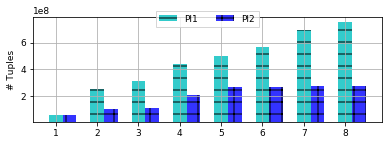

In [6]:

data = {1: {0: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}}, 
        2: {0: {1: 4*56695698, 2: 97846972.0, 3: 41974279.0, 4: 3533054.0, 6: 139045.0}}, 
        3: {0: {1: 4*56695698, 2: 105819150.0, 3: 42248848.0, 4: 10581402.0, 6: 435595.0}}, 
        4: {0: {1: 5*56695698, 2: 202553180.0, 3: 91754930.0, 4: 151872496.0, 6: 2568087.0}}, 
        5: {0: {1: 7*56695698, 2: 259248878.0, 3: 92990516.0, 4: 303297552.0, 6: 2592490.0}}, 
        6: {0: {1: 8*56695698, 2: 259820918.0, 3: 93067247.0, 4: 304094417.0, 6: 2620900.0}}, 
        7: {0: {1: 10*56695698, 2: 260392984.0, 3: 93144003.0, 4: 399496820.0, 6: 3039192.0}}, 
        8: {0: {1: 12*56695698, 2: 260440921.0, 3: 93145989.0, 4: 361048436.0, 6: 3281211.0}}
       }

data = {1: {0: {1: [62874534], 2: [62874534], 3: [1399803], 4: [622], 6: [166]}}, 
        2: {0: {1: [251498136], 2: [104025808], 3: [42055768], 4: [21171], 6: [17009]}}, 
        3: {0: {1: [314372670], 2: [112834496], 3: [42354403], 4: [78621], 6: [17033]}}, 
        4: {0: {1: [440121738], 2: [209568526], 3: [91860485], 4: [50556536], 6: [18956]}}, 
        5: {0: {1: [502996272], 2: [272443060], 3: [93172940], 4: [182418649], 6: [19164]}}, 
        6: {0: {1: [565870806], 2: [273076324], 3: [93173022], 4: [238066263], 6: [20046]}}, 
        7: {0: {1: [691619874], 2: [273648390], 3: [93249778], 4: [354153093], 6: [30623]}}, 
        8: {0: {1: [754494408], 2: [273708649], 3: [93249784], 4: [460873359], 6: [50598]}}
       }
modes = [1,2,3,4,6]
modes = [1,2]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
n_queries = data.keys()
n_queries.sort()

def get_plot_data(data, modes):
    x_labs = data.keys()
    x_labs.sort()
    
    out = {}
    for x_lab in x_labs:
        out[x_lab] = {}
        for mode in modes:
            out[x_lab][mode]= data[x_lab][0][mode][0]          
    return out




def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
#     matplotlib.rcParams['figure.figsize']= [9.375, 1.93]
    matplotlib.rcParams['figure.figsize']= [6.25, 1.93]
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = n_queries
    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[qid][mode] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
#     plt.xlabel('# Applications')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, n_queries, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
#     ax.set_yscale("log", nonposy='clip')
    ax.set_ylim(ymin=10000000)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/multi_query_analysis.eps"
#     plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data, modes)
print plot_data
draw_plots(plot_data, modes, modes_2_labels)


{1: {1: [188623602], 2: [41151274], 3: [40655965], 4: [20549], 6: [16843]}, 2: {1: [314372670], 2: [41723340], 3: [40732721], 4: [24286], 6: [20401]}, 3: {1: [440121738], 2: [138457370], 3: [90238803], 4: [3189682], 6: [23098]}, 4: {1: [502996272], 2: [201331904], 3: [91638606], 4: [50197174], 6: [30993]}, 5: {1: [565870806], 2: [264206438], 3: [92951061], 4: [206152004], 6: [28225]}, 6: {1: [628745340], 2: [264839702], 3: [92951143], 4: [251970512], 6: [32218]}, 7: {1: [691619874], 2: [273648390], 3: [93249778], 4: [390855408], 6: [88174]}, 8: {1: [754494408], 2: [273708649], 3: [93252015], 4: [460873359], 6: [45302]}}
[0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 3, 4, 5, 6, 7, 8] 8
[0, 1, 2, 3, 4, 5, 6, 7]
1 [0, 1, 2, 3, 4, 5, 6, 7] [[188623602], [314372670], [440121738], [502996272], [565870806], [628745340], [691619874], [754494408]]
2 [0, 1, 2, 3, 4, 5, 6, 7] [[41151274], [41723340], [138457370], [201331904], [264206438], [264839702], [273648390], [273708649]]
3 [0, 1, 2, 3, 4, 5, 6, 7] [[4065

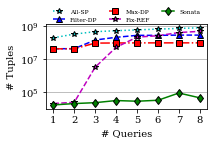

In [27]:
# Multi query analysis
data = {1: {0: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}}, 
        2: {0: {1: 4*56695698, 2: 97846972.0, 3: 41974279.0, 4: 3533054.0, 6: 139045.0}}, 
        3: {0: {1: 4*56695698, 2: 105819150.0, 3: 42248848.0, 4: 10581402.0, 6: 435595.0}}, 
        4: {0: {1: 5*56695698, 2: 202553180.0, 3: 91754930.0, 4: 151872496.0, 6: 2568087.0}}, 
        5: {0: {1: 7*56695698, 2: 259248878.0, 3: 92990516.0, 4: 303297552.0, 6: 2592490.0}}, 
        6: {0: {1: 8*56695698, 2: 259820918.0, 3: 93067247.0, 4: 304094417.0, 6: 2620900.0}}, 
        7: {0: {1: 10*56695698, 2: 260392984.0, 3: 93144003.0, 4: 399496820.0, 6: 3039192.0}}, 
        8: {0: {1: 12*56695698, 2: 260440921.0, 3: 93145989.0, 4: 361048436.0, 6: 3281211.0}}
       }

data = {1: {0: {1: [62874534], 2: [62874534], 3: [1399803], 4: [622], 6: [166]}}, 
        2: {0: {1: [251498136], 2: [104025808], 3: [42055768], 4: [21171], 6: [17009]}}, 
        3: {0: {1: [314372670], 2: [112834496], 3: [42354403], 4: [78621], 6: [17033]}}, 
        4: {0: {1: [440121738], 2: [209568526], 3: [91860485], 4: [50556536], 6: [18956]}}, 
        5: {0: {1: [502996272], 2: [272443060], 3: [93172940], 4: [182418649], 6: [19164]}}, 
        6: {0: {1: [565870806], 2: [273076324], 3: [93173022], 4: [238066263], 6: [20046]}}, 
        7: {0: {1: [691619874], 2: [273648390], 3: [93249778], 4: [354153093], 6: [30623]}}, 
        8: {0: {1: [754494408], 2: [273708649], 3: [93249784], 4: [460873359], 6: [50598]}}
       }

#     sigma_max = 16
#     width_max = 4
#     bits_max_stage = 8 * 1000000
#     bits_max_register = 0.5 * bits_max_stage
#     ref_levels = [0, 4, 8, 12, 16, 20, 24, 28, 32]
#     M = 2048
data = {1: {0: {1: [188623602], 2: [41151274], 3: [40655965], 4: [20549], 6: [16843]}},
        2: {0: {1: [314372670], 2: [41723340], 3: [40732721], 4: [24286], 6: [20401]}},
        3: {0: {1: [440121738], 2: [138457370], 3: [90238803], 4: [3189682], 6: [23098]}},
        4: {0: {1: [502996272], 2: [201331904], 3: [91638606], 4: [50197174], 6: [30993]}},
        5: {0: {1: [565870806], 2: [264206438], 3: [92951061], 4: [206152004], 6: [28225]}},
        6: {0: {1: [628745340], 2: [264839702], 3: [92951143], 4: [251970512], 6: [32218]}},
        7: {0: {1: [691619874], 2: [273648390], 3: [93249778], 4: [390855408], 6: [88174]}},
        8: {0: {1: [754494408], 2: [273708649], 3: [93252015], 4: [460873359], 6: [45302]}}}

modes = [1,2,3,4,6]
modes = [1,2,3, 4, 6]
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
n_queries = data.keys()
n_queries.sort()

def get_plot_data(data, modes):
    x_labs = data.keys()
    x_labs.sort()
    
    out = {}
    for x_lab in x_labs:
        out[x_lab] = {}
        for mode in modes:
            out[x_lab][mode]= data[x_lab][0][mode]          
    return out

matplotlib.rcParams['font.size']= 10



def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
#     matplotlib.rcParams['figure.figsize']= [9.375, 1.93]
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
    matplotlib.rcParams['legend.fontsize']= 6
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = n_queries
    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [data[qid][mode] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        x = xlab
        
        print mode, x, y
#         ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], 
                marker=markers[mode], mec='k')
        
        ctr += 1
   
    plt.xlabel('# Queries')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, n_queries, rotation=0)
#     ax.grid(True)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_ylim(ymin=1)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.24),
              ncol=3, fancybox=False, shadow=False, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/multi_query_analysis_log.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data, modes)
print plot_data
draw_plots(plot_data, modes, modes_2_labels)


## Sensitivity: Pipeline Depth

[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]
[0, 1, 2, 3, 4, 5, 6]
3 [0, 1, 2, 3, 4, 5, 6] [[273708649.0], [273708649.0], [93252016.0], [93249783.0], [93249783.0], [93252015.0], [93252015.0]]
4 [0, 1, 2, 3, 4, 5, 6] [[981650190.0], [981650190.0], [544659227.0], [460873359.0], [460873359.0], [524372416.0], [471150990.0]]
6 [0, 1, 2, 3, 4, 5, 6] [[273708649.0], [273708649.0], [6803475.0], [569019.0], [47657.0], [36667.99999999742], [36667.0]]
[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]


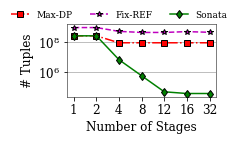

In [438]:
data = {1: {32: 2*56695698, 1: 2*56695698, 2: 2*56695698, 4: 2*56695698, 8: 2*56695698, 12: 2*56695698, 16: 2*56695698},
        2: {32: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {32: 1318391.0, 1: 57267738.0, 2: 57267738.0, 4: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {32: 7803.0, 1: 346637238.0, 2: 346637238.0, 4: 125096772.0, 8: 5232595.0, 12: 1007807.0, 16: 7803.0}, 
        6: {32: 4084.0, 1: 57267738.0, 2: 57267738.0, 4: 1029656.0, 8: 4084.0, 12: 4084.0, 16: 4084.0}}

data = {1: {32: [754494408], 1: [754494408], 2: [754494408], 4: [754494408], 8: [754494408], 12: [754494408], 16: [754494408]},
        3: {32: [93252015.0], 1: [273708649.0], 2: [273708649.0], 4: [93252016.0], 8: [93249783.0], 12: [93249783.0], 16: [93252015.0]},
        4: {32: [471150990.0], 1: [981650190.0], 2: [981650190.0], 4: [544659227.0], 8: [460873359.0], 12: [460873359.0], 16: [524372416.0]},
        6: {32: [36667.0], 1: [273708649.0], 2: [273708649.0], 4: [6803475.0], 8: [569019.0], 12: [47657.0], 16: [36667.99999999742]}}
Ds = [1,2,4,8,12,16,32]
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 12

def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = [shift*l+(0.5*bar_width)*len(modes) for l in xlab]
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        x = xlab
        
        print mode, x, y
#         ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], marker=markers[mode], 
                mec='k', mfc=color_n[mode])
        
        ctr += 1
   
    plt.xlabel('Number of Stages')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.3),
              ncol=3, fancybox=False, shadow=False, fontsize=9, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_D_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

## Sensitivity: Pipeline Width

[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]
[0, 1, 2, 3, 4, 5, 6]
3 [0, 1, 2, 3, 4, 5, 6] [[93249783.0], [93252015.0], [93252015.0], [93252015.0], [93252015.0], [93249783.0], [93249783.0]]
4 [0, 1, 2, 3, 4, 5, 6] [[463322959.0], [487275552.0], [524372416.0], [461191726.0], [460873359.0], [461605303.0], [481882709.0]]
6 [0, 1, 2, 3, 4, 5, 6] [[3428875.0], [411728.0], [36667.99999999742], [30772.0], [30925.0], [37823.0], [38088.0]]
[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]


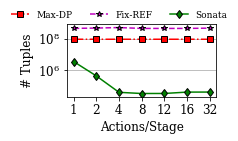

In [16]:
data = {1: {32: 113391396, 1: 113391396, 2: 113391396, 4: 113391396, 8: 113391396, 12: 113391396, 16: 113391396},
        2: {32: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {32: 1318391.0, 1: 1318391.0, 2: 1318391.0, 4: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {32: 7803.0, 1: 6783472.0, 2: 1007807.0, 4: 7803.0, 8: 7803.0, 12: 7803.0, 16: 7803.0}, 
        6: {32: 4084.0, 1: 4084.0, 2: 4084.0, 4: 4084.0, 8: 4084.0, 12: 4084.0, 16: 4084.0}}

data = {1: {32: [754494408], 1: [754494408], 2: [754494408], 4: [754494408], 8: [754494408], 12: [754494408], 16: [754494408]},
        2: {32: [273708649.0], 1: [273708649.0], 2: [273708649.0], 4: [273708649.0], 8: [273708649.0], 12: [273708649.0], 16: [273708649.0]},
        3: {32: [93249783.0], 1: [93249783.0], 2: [93252015.0], 4: [93252015.0], 8: [93252015.0], 12: [93252015.0], 16: [93249783.0]},
        4: {32: [481882709.0], 1: [463322959.0], 2: [487275552.0], 4: [524372416.0], 8: [461191726.0], 12: [460873359.0], 16: [461605303.0]},
        6: {32: [38088.0], 1: [3428875.0], 2: [411728.0], 4: [36667.99999999742], 8: [30772.0], 12: [30925.0], 16: [37823.0]}}

Ds = [1,2,4,8,12,16,32]
modes = [6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}
matplotlib.rcParams['font.size']= 12

def draw_plots(data, modes, modes_2_labels):
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = [shift*l+(0.5*bar_width)*len(modes) for l in xlab]
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        x= xlab
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
#         pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], marker=markers[mode], 
                mec='k', mfc=color_n[mode])
        
        ctr += 1
   
    plt.xlabel('Actions/Stage')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.3),
              ncol=3, fancybox=False, shadow=False, fontsize=9, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_W_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

## Sensitivity: Memory

[0, 1, 2, 3, 4, 5, 6, 7] [0.5, 1, 2, 4, 8, 12, 16, 32]
[0, 1, 2, 3, 4, 5, 6, 7]
3 [0, 1, 2, 3, 4, 5, 6, 7] [[273650626.0], [265140574.0], [265140574.0], [94875815.0], [93252015.0], [92951163.0], [52803488.0], [51664452.0]]
4 [0, 1, 2, 3, 4, 5, 6, 7] [[748845677.0], [653765550.0], [544263298.0], [550037213.0], [524372416.0], [460873359.0], [526618658.0], [536954926.0]]
6 [0, 1, 2, 3, 4, 5, 6, 7] [[201198175.0], [193181584.0], [885684.0], [332650.0], [36667.99999999742], [28643.0], [28643.0], [28643.0]]
[0, 1, 2, 3, 4, 5, 6, 7] [0.5, 1, 2, 4, 8, 12, 16, 32]


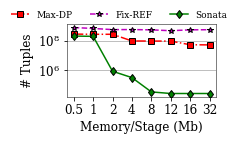

In [437]:
data = {1: {0.5: 113391396, 1: 113391396, 2: 113391396, 4: 113391396, 32: 113391396, 8: 113391396, 12: 113391396, 16: 113391396}, 
        2: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 32: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 1890354.0, 32: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {0.5: 343375659.0, 1: 302304168.0, 2: 2406992.0, 4: 1007807.0, 32: 1007806.0, 8: 1007807.0, 12: 1007806.0, 16: 1007806.0}, 
        6: {0.5: 56695952.0, 1: 56695945.0, 2: 1546913.0, 4: 6140.0, 32: 1881.0, 8: 4084.0, 12: 2985.0, 16: 2216.0}
       }

data = {1: {0.5: [754494408], 1: [754494408], 2: [754494408], 4: [754494408], 32: [754494408], 8: [754494408], 12: [754494408], 16: [754494408]},
        2: {0.5: [273708649.0], 1: [273708649.0], 2: [273708649.0], 4: [273708649.0], 32: [273708649.0], 8: [273708649.0], 12: [273708649.0], 16: [273708649.0]},
        3: {0.5: [273650626.0], 1: [265140574.0], 2: [265140574.0], 4: [94875815.0], 32: [51664452.0], 8: [93252015.0], 12: [92951163.0], 16: [52803488.0]},
        4: {0.5: [748845677.0], 1: [653765550.0], 2: [544263298.0], 4: [550037213.0], 32: [536954926.0], 8: [524372416.0], 12: [460873359.0], 16: [526618658.0]},
        6: {0.5: [201198175.0], 1: [193181584.0], 2: [885684.0], 4: [332650.0], 32: [28643.0], 8: [36667.99999999742], 12: [28643.0], 16: [28643.0]}}

Ds = data[6].keys()
Ds.sort()
modes = [6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 12



def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = xlab
        
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
#         pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], marker=markers[mode], 
                mec='k', mfc=color_n[mode])
        
        ctr += 1
   
    plt.xlabel('Memory/Stage (Mb)')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.3),
              ncol=3, fancybox=False, shadow=False, fontsize=9, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_B_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

{0.25: {3: [212146570.0], 4: [754494408], 6: [212146570.0]}, 0.5: {3: [93805347.0], 4: [754494408], 6: [54003387.0]}, 2.0: {3: [93252015.0], 4: [524372416.0], 6: [36667.99999999742]}, 4.0: {3: [93252015.0], 4: [13099045.0], 6: [22940.0]}, 1.0: {3: [93249783.0], 4: [754494408], 6: [3121570.0]}, 8.0: {3: [93252015.0], 4: [12986863.0], 6: [22940.0]}}
[0, 1, 2, 3, 4, 5] [0.25, 0.5, 1.0, 2.0, 4.0, 8.0]
[0, 1, 2, 3, 4, 5]
3 [0, 1, 2, 3, 4, 5] [[212146570.0], [93805347.0], [93249783.0], [93252015.0], [93252015.0], [93252015.0]]
4 [0, 1, 2, 3, 4, 5] [[754494408], [754494408], [754494408], [524372416.0], [13099045.0], [12986863.0]]
6 [0, 1, 2, 3, 4, 5] [[212146570.0], [54003387.0], [3121570.0], [36667.99999999742], [22940.0], [22940.0]]
[0, 1, 2, 3, 4, 5] [0.25, 0.5, 1.0, 2.0, 4.0, 8.0]


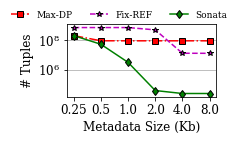

In [13]:
data = {1: {0.5: 113391396, 1: 113391396, 2: 113391396, 4: 113391396, 32: 113391396, 8: 113391396, 12: 113391396, 16: 113391396}, 
        2: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 32: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 1890354.0, 32: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {0.5: 343375659.0, 1: 302304168.0, 2: 2406992.0, 4: 1007807.0, 32: 1007806.0, 8: 1007807.0, 12: 1007806.0, 16: 1007806.0}, 
        6: {0.5: 56695952.0, 1: 56695945.0, 2: 1546913.0, 4: 6140.0, 32: 1881.0, 8: 4084.0, 12: 2985.0, 16: 2216.0}
       }

data = {
#         128: {3: [754494408], 4: [754494408], 6: [754494408]},
        256: {3: [212146570.0], 4: [754494408], 6: [212146570.0]},
        512: {3: [93805347.0], 4: [754494408], 6: [54003387.0]},
        1024: {3: [93249783.0], 4: [754494408], 6: [3121570.0]},
        2048: {3: [93252015.0], 4: [524372416.0], 6: [36667.99999999742]},
        4096: {3: [93252015.0], 4: [13099045.0], 6: [22940.0]},
        8192: {3: [93252015.0], 4: [12986863.0], 6: [22940.0]}
       }

modes = [3,4,6]


new_data = {}
for key in data.keys():
    new_key = float(key)/1024
    new_data[new_key] = data[key]

data = new_data
print data

new_data = {}
for mode in modes:
    new_data[mode] = {}
    for meta in data.keys():
        new_data[mode][meta] = data[meta][mode] 

data = new_data
Ds = data[6].keys()
Ds.sort()
modes = [6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 12



def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = xlab
        
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
#         pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], marker=markers[mode], 
                mec='k', mfc=color_n[mode])
        
        ctr += 1
   
    plt.xlabel('Metadata Size (Kb)')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.3),
              ncol=3, fancybox=False, shadow=False, fontsize=9, frameon=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_M_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

## Sensititvity: Refinement Levels

[0, 1, 2, 3] [1, 2, 4, 8]
[0, 1, 2, 3]
4 [0, 1, 2, 3] [93249783.0, 97468.0, 2873745.0, 524372416.0]
6 [0, 1, 2, 3] [93249783.0, 97351.0, 36719.0, 36667.999999997417]
[0, 1, 2, 3] [1, 2, 4, 8]


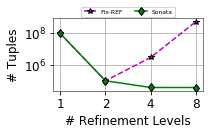

In [420]:
data = {8: {6: [17321.0]}, 1: {6: [42055768.0]}, 2: {6: [30325.0]}, 4: {6: [17187.0]}}
data = {8: {4: [524372416.0], 6: [36667.99999999742]},
        1: {4: [93249783.0],6: [93249783.0]},
        2: {4: [97468.0], 6: [97351.0]},
        4: {4: [2873745.0], 6: [36719.0]}}

Rs = data.keys()
Rs.sort()
modes = [4, 6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
# modes = [6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
modes_2_labels = {1: "All-SP", 2: "Filter-DP", 3: "Max-DP", 4: "Fix-REF", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'Times'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 12



def draw_plots(data):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Rs
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [np.median(data[qid][mode]) for qid in qids]
        
        x = xlab
        
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
#         pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        pl.plot(x,y,label=modes_2_labels[mode],color=color_n[mode],linestyle=linestyles[mode], marker=markers[mode], 
                mec='k', mfc=color_n[mode])
        
        ctr += 1
   
    plt.xlabel('# Refinement Levels')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_R_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data)


[0]
0 [0]


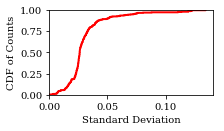

In [5]:
out = [0.02602396082707675, 0.03269452326771307, 0.026090409302842902, 0.051773571583712701, 0.041799471683420839, 0.02602396082707675, 0.032181447730014412, 0.051232586068901576, 0.026934469635825003, 0.031334717864682608, 0.025959101288505013, 0.031529966324114825, 0.025860661007167152, 0.042618413946833307, 0.025959101288505013, 0.031682596170267835, 0.026934469635825003, 0.050295564831398021, 0.025795612404842547, 0.026145320137262052, 0.027561101727456405, 0.051472724577223454, 0.025860661007167152, 0.058288800782803893, 0.033856101478070978, 0.026145320137262052, 0.052929463750987428, 0.05219013376007646, 0.031624408251114074, 0.030586364146390637, 0.032590070409837878, 0.040971651573006668, 0.049948883925159455, 0.040725259563023558, 0.026090409302842902, 0.027561101727456405, 0.010049501390182217, 0.063944204558387271, 0.025053796746098037, 0.12171445913072416, 0.060313994774117953, 0.0097301990016696177, 0.065328365756188153, 0.074502770511578428, 0.03161710929867971, 0.075551157640848646, 0.024390723038154698, 0.11360397096139732, 0.0033112582781457123, 0.07578459025772287, 0.024326574244428571, 0.1345937502115053, 0.031682291828676719, 0.029822906368624644, 0.0, 0.018683911068382367, 0.038984565548255475, 0.119662965767023, 0.0026178010471203939, 0.087939373055152772, 0.11941664162560711, 0.017760017838158795, 0.080496836921645845, 0.073335663965619011, 0.12291201904051384, 0.12240322678992782, 0.11080112203021558, 0.067544755174265947, 0.032528574701147464, 0.049124492230750445, 0.024993620855765942, 0.039360016669050556, 0.17260342449893723, 0.20567181771601961, 0.35219899680105915, 0.38012835191257432, 0.22899016015245191, 0.2594408275440932, 0.36878228080809561, 0.39825318453684116, 0.300555906960083, 0.32719184526807521, 0.30000807371319937, 0.35839946253365157, 0.33746895703081436, 0.37209796269538553, 0.35460672654109698, 0.37898933956589259, 0.28333195564747882, 0.30661381784342495, 0.31599505749072981, 0.35284353091197812, 0.26258165159214947, 0.28958845382416504, 0.30220062374378409, 0.33703390517763238, 0.28731309108130598, 0.33938969336377994, 0.30277537141871691, 0.32771074400755845, 0.34481973682362033, 0.37391927070042952, 0.28793779204869541, 0.33178379714592254, 0.35495445096176731, 0.37508210810176479, 0.1846679701930467, 0.32511843497606668, 0.13169523994010424, 0.14213034594035306, 0.32191245135496971, 0.35537022612645958, 0.29171781783020617, 0.31254577329971994, 0.37653328241693407, 0.40606362638226706, 0.14854699583648479, 0.17815787495514634, 0.095201685287303092, 0.28146752539316233, 0.27437472130992696, 0.33389365345190242, 0.20792413464652354, 0.22797399461592852, 0.33472258841145319, 0.35141478960959111, 0.33709844503096409, 0.35528196734489925, 0.25488087428024248, 0.33450182926801986, 0.25601613284715125, 0.32167148173723342, 0.27098852036892324, 0.33317176575487933, 0.29246436458234715, 0.34658050868756601, 0.1846679701930467, 0.32787368246067683, 0.28960163916843967, 0.32426165463731205, 0.3332505186136212, 0.35951005974301531, 0.35551189345608342, 0.37449982312069785, 0.022465436065377584, 0.031555933522581452, 0.022781491820833812, 0.10639427044203117, 0.22226082858757565, 0.024909304296416003, 0.028798768781058189, 0.093946895834547725, 0.024978554014104037, 0.027339363974873122, 0.024062724442289324, 0.025934261644738017, 0.024401858254735238, 0.22554877895942343, 0.026728473492387762, 0.025433381671075367, 0.027581802338866458, 0.30857389811982999, 0.021801954653434104, 0.025044316971034406, 0.028811601720321569, 0.097968610872828044, 0.022134629563364761, 0.36929458507083668, 0.27055479152392781, 0.022366908302782932, 0.10254795608670528, 0.09731932173404996, 0.025496730368462495, 0.25023584820028871, 0.26037945673462987, 0.23092977448549187, 0.29824962944236666, 0.22199700290153868, 0.025438273910712843, 0.031218101418683496, 0.023092897317973708, 0.021142966076895951, 0.026278057007119739, 0.021832007449842816, 0.024300183288334713, 0.015799461678914328, 0.025838102868284918, 0.024378727436893424, 0.036692193881667556, 0.11809738987657462, 0.022974393627046012, 0.02109754226556829, 0.024724535136516283, 0.020435271972488622, 0.026604987326161254, 0.020748786564248053, 0.025033211193177814, 0.020970086692560789, 0.024197441737057516, 0.016680753945042731, 0.024599504148694811, 0.017593421211095774, 0.023873541980213572, 0.016280357071176976, 0.022251409804163361, 0.022075800635042032, 0.032617773414675588, 0.085431222168642976, 0.024445180732138076, 0.017454459982505579, 0.023278273085895373, 0.01696455735227614, 0.024831591731498126, 0.020920288075986351, 0.02470056777519266, 0.02428317453266678, 0.022262260709211498, 0.022247042715242062, 0.023572878212623979, 0.015563777483375535, 0.027361867278786468, 0.02213614895581335, 0.026268005756668426, 0.022428777496904244, 0.02239290969185493, 0.022205583975965108, 0.030757808781897399, 0.026650568208979496, 0.037968118679048798, 0.16555110545504861, 0.023683426063454745, 0.015774400177932611, 0.028749048205226786, 0.025223673552204184, 0.02723960764270698, 0.024005741266411116, 0.02274443833658548, 0.02144358714381556, 0.041133645589684728, 0.05073080809516637, 0.041998772923389521, 0.12186966375855862, 0.036222304752485529, 0.04535593811656375, 0.02646630679027448, 0.041337596957954109, 0.038283478240943941, 0.096062344725466667, 0.024192847644642357, 0.015470714583437266, 0.026460005524014604, 0.021889657678387631, 0.41111502935761135, 0.40517213031678539, 0.4171297522121209, 0.34640304240611008, 0.4111878860488884, 0.28295384282302066, 0.40926822027824783, 0.40747577030346704, 0.41508135523189998, 0.41233792670295311, 0.41000991051735919, 0.40528494423436495, 0.41713069562973143, 0.35589082831387214, 0.41141051368065301, 0.39501001586933399, 0.40047603720989178, 0.1473201158384766, 0.4171518597473452, 0.36055436874632824, 0.40505255822982816, 0.19537639344225499, 0.41775571999215333, 0.38023627568893076, 0.40797657159798262, 0.40758288340517101, 0.41693861897038498, 0.40637356522471096, 0.4080048714090333, 0.25246788854520569, 0.41613102138962554, 0.40539725432173768, 0.40555580897484528, 0.2270106519640108, 0.39743110514484548, 0.39636821356583835, 0.40717699279030967, 0.40713111601175389, 0.41117427475662283, 0.3762576397677454, 0.39873619552039569, 0.13112103023808475, 0.41188900501331072, 0.40233373752005558, 0.40917787151031554, 0.40868145327530436, 0.37297663946630122, 0.37089447719230761, 0.40765537544994002, 0.39903735246362693, 0.41183160022510906, 0.3673678417602857, 0.41339552807329311, 0.38716896353341029, 0.41232112140318294, 0.39385074810724718, 0.413936871039702, 0.41279465480594441, 0.40260286285788538, 0.40204593156830215, 0.40404777353612015, 0.40132459268617859, 0.41614408358382188, 0.41553676175032306, 0.40145214346688135, 0.39210719614569139, 0.41430365812758468, 0.41464465649777488, 0.41144311019024343, 0.30815384779934035, 0.40463858075448594, 0.21359176307766617, 0.028146758056062895, 0.0230492779316149, 0.035293690320415148, 0.035772072354374809, 0.02767182584185535, 0.016077780953286026, 0.021186657305265665, 0.019875807257700381, 0.026511957245193153, 0.024041973618784948, 0.02882834425325604, 0.023723778039740011, 0.033309450357766085, 0.034289221782827062, 0.023818586661530597, 0.045092382429979684, 0.02863316867793568, 0.02645543111606273, 0.03189447900598482, 0.029971723470850437, 0.028410244792295373, 0.022856545356839553, 0.030730339707054941, 0.021026778362352984, 0.028759941733110844, 0.028148087411484488, 0.027412744247621919, 0.027312983836717323, 0.028733706897041741, 0.021553745627500755, 0.031082641168570003, 0.026073122342047634, 0.028827839293432467, 0.023905160820248687, 0.027224292867595631, 0.020908427051369159, 0.026897246760028099, 0.026830827655147941, 0.028542737906154868, 0.017475823691518285, 0.029123476008349487, 0.026630625567152792, 0.022328713928522249, 0.035568231121646733, 0.028101131624208135, 0.027319666601397733, 0.036207121180402278, 0.031916005280939547, 0.034019501841010845, 0.025385625086910522, 0.027898775000064623, 0.017203375517168384, 0.023726085292033548, 0.03614494888268098, 0.023735032908752916, 0.03941205066300893, 0.031250284925626967, 0.029705906687324687, 0.033277493736767423, 0.033142863477771206, 0.033489932150880163, 0.033226391567312177, 0.026307682369271078, 0.024138597057432161, 0.027963654668858955, 0.012094553252165414, 0.026477765667741772, 0.018568598145562314, 0.028659160527272041, 0.016822643645120688, 0.029447916398200928, 0.024192900900623183]
out = [0.02602396082707675, 0.03269452326771307, 0.026090409302842902, 0.051773571583712701, 0.041799471683420839, 0.02602396082707675, 0.032181447730014412, 0.051232586068901576, 0.026934469635825003, 0.031334717864682608, 0.025959101288505013, 0.031529966324114825, 0.025860661007167152, 0.042618413946833307, 0.025959101288505013, 0.031682596170267835, 0.026934469635825003, 0.050295564831398021, 0.025795612404842547, 0.026145320137262052, 0.027561101727456405, 0.051472724577223454, 0.025860661007167152, 0.058288800782803893, 0.033856101478070978, 0.026145320137262052, 0.052929463750987428, 0.05219013376007646, 0.031624408251114074, 0.030586364146390637, 0.032590070409837878, 0.040971651573006668, 0.049948883925159455, 0.040725259563023558, 0.026090409302842902, 0.027561101727456405, 0.010049501390182217, 0.063944204558387271, 0.025053796746098037, 0.12171445913072416, 0.060313994774117953, 0.0097301990016696177, 0.065328365756188153, 0.074502770511578428, 0.03161710929867971, 0.075551157640848646, 0.024390723038154698, 0.11360397096139732, 0.0033112582781457123, 0.07578459025772287, 0.024326574244428571, 0.1345937502115053, 0.031682291828676719, 0.029822906368624644, 0.0, 0.018683911068382367, 0.038984565548255475, 0.119662965767023, 0.0026178010471203939, 0.087939373055152772, 0.11941664162560711, 0.017760017838158795, 0.080496836921645845, 0.073335663965619011, 0.12291201904051384, 0.12240322678992782, 0.11080112203021558, 0.067544755174265947, 0.032528574701147464, 0.049124492230750445, 0.024993620855765942, 0.039360016669050556, 0.038507807515741815, 0.042488586300849035, 0.08575143360051958, 0.081924366060096399, 0.032914541422078669, 0.034128903922267924, 0.12023481266191796, 0.14864155421205588, 0.25223138389235422, 0.28121783085695362, 0.097057018329140182, 0.11914735026831816, 0.087307346305533551, 0.081533134110769595, 0.13582048098323724, 0.15072982643041813, 0.080973075493689234, 0.087741416854383969, 0.093932159535191267, 0.08263822333078967, 0.044193702130720131, 0.051076306298951303, 0.092758962066115336, 0.080077322187783351, 0.11118976930859771, 0.14965014014466399, 0.25543639946994318, 0.28132390506932425, 0.072996046257117475, 0.068753983662291698, 0.10437232039743559, 0.10360242076613566, 0.057459219331327763, 0.055242492349413225, 0.15454855433823397, 0.1937540184039625, 0.036668066863774787, 0.037722149275574969, 0.085330019572709595, 0.092743231295794787, 0.087410804653180518, 0.093891131665903835, 0.1104043821191214, 0.11572405002213554, 0.038856198747709694, 0.043929430998260181, 0.1023232198590039, 0.021488077977275751, 0.18689924484630888, 0.21852959955085477, 0.035808663911535477, 0.036260839692402472, 0.18119331722893739, 0.19493689306844539, 0.17219911576713992, 0.18718195059849727, 0.12513102708746562, 0.14193398880194016, 0.17202827115524208, 0.19652592957547008, 0.1869808731908465, 0.21999807264120752, 0.14259137517915343, 0.16012867611306722, 0.15454855433823397, 0.16122632394991279, 0.21111684528582131, 0.25548912399227197, 0.075252233017112896, 0.066542278399067067, 0.059231745312671238, 0.058528831231670506, 0.024508541171943184, 0.026558594415374087, 0.024061522532574542, 0.12696492829985767, 0.235039907487714, 0.027832858864488871, 0.024817817555030396, 0.1125905560369873, 0.024323086790534174, 0.024562268947858235, 0.024372659074697843, 0.023107993857724704, 0.027146586979299534, 0.24117797917474387, 0.028287193037633333, 0.022771441599662625, 0.028279748908676641, 0.33685016935004458, 0.023951620310876328, 0.027982934649649318, 0.026509041457295112, 0.11711613339319857, 0.024108496600134775, 0.41525431571889904, 0.27571618756668531, 0.024296016831430983, 0.12341122984674972, 0.11682880384605282, 0.022893299131888131, 0.25578234412089906, 0.26394631257689344, 0.24334888425111489, 0.32840534838945673, 0.23472212275542204, 0.027801971785781147, 0.03034353548265695, 0.023927632745552593, 0.021879138500287915, 0.026247629249024535, 0.023348484500951245, 0.025369403890868163, 0.016598826300739201, 0.026852137749435318, 0.025959658824328317, 0.016183639283980537, 0.045743302021281886, 0.023685610959561679, 0.021786939095527869, 0.025046555655590469, 0.021616574197216975, 0.027693270492353438, 0.023266859539045146, 0.025595258852122302, 0.022395032493458561, 0.024633175957366454, 0.017171095602594659, 0.025349747857124651, 0.019059111229801484, 0.024608309207754451, 0.014042592931793108, 0.022558540961060761, 0.022385546801383587, 0.017551238133663934, 0.025199075472213516, 0.025013134671226716, 0.018868659180064484, 0.023980214210706029, 0.016454297706163915, 0.025226518585398074, 0.022244212188311609, 0.024829987773534581, 0.02438084865720834, 0.022353146461327789, 0.022337866339848227, 0.024550974965938104, 0.01641025544978086, 0.02716435738032999, 0.023801202370703736, 0.027402940367551278, 0.025493813429236168, 0.022823147491066485, 0.022636946850680788, 0.026171959586361614, 0.02436489528023935, 0.026771947543571224, 0.032697448345736568, 0.024802161652513387, 0.016727257923909639, 0.029206337369260545, 0.02821860517846296, 0.028162137334043592, 0.026248592386122007, 0.023126568408803463, 0.02165110054024624, 0.024770440645769908, 0.024102608631012951, 0.024737073057750209, 0.023456717563760766, 0.014748644368014485, 0.015047202064785841, 0.027939048229034889, 0.023277765581064539, 0.015254184262380576, 0.035103942345003081, 0.025106608803488445, 0.016227795550473482, 0.026339707452474329, 0.023425661617788012, 0.026419781914471707, 0.023240067396761727, 0.007202630865862281, 0.018012166951683711, 0.025248115965910436, 0.015951293189551172, 0.038759630619142574, 0.041706663194333436, 0.03305421691829049, 0.045759388438483449, 0.025988758054901376, 0.023222627675339887, 0.0077022966637920907, 0.020615288257475411, 0.037577193400488589, 0.069779574028081104, 0.026226130620655375, 0.022415820485755199, 0.0069397962691440593, 0.025868989879082878, 0.025113846084620351, 0.018907241560818053, 0.0063781560533810022, 0.026303134255668336, 0.024258416093264883, 0.024020306841791701, 0.034227298168104957, 0.044209344451645656, 0.025294970712236405, 0.018918824574848947, 0.0066361912563382454, 0.013509176668013385, 0.026100193317739356, 0.021666397807632548, 0.026926152928052349, 0.025752462059313624, 0.018553565987265614, 0.01853241974036348, 0.025658997955048456, 0.015214084514832202, 0.026810397801290044, 0.023771374772604371, 0.039092631334148538, 0.054280763219918093, 0.024874044434512087, 0.024574331010843092, 0.025910681601095314, 0.023273059672903936, 0.027563687893663188, 0.027794487855906127, 0.026007651061301922, 0.015764197549887272, 0.037441168560568963, 0.060812730711729053, 0.036560688317377757, 0.072165481091271674, 0.0071007361883524984, 0.0054172377797752982, 0.025014896431555987, 0.025408973814462995, 0.025831957446833326, 0.026556808490592186, 0.034127814722530639, 0.034967691195863161, 0.028842894530650847, 0.02130830771064279, 0.033004513766737104, 0.034880766848888238, 0.025142802272039435, 0.015451986522178588, 0.02664106286394792, 0.022960899311688498, 0.028878296343346405, 0.024243875068143499, 0.039129254709022551, 0.036577621236795914, 0.028512483581312378, 0.016547305795442138, 0.013382040313794771, 0.012485227113406215, 0.022948486788045473, 0.0075065521836789242, 0.030121563019333761, 0.025150570906496816, 0.036409438906586981, 0.033740992263465906, 0.013441465981899854, 0.040986000081865287, 0.028794421193664866, 0.025475590229958087, 0.034191500120825953, 0.030757608943526107, 0.028727276493532284, 0.022447142750643193, 0.033366497897284006, 0.024623858609956653, 0.030013194005306072, 0.029347899805822173, 0.024546940376965361, 0.0093009115262672939, 0.030013607382585943, 0.023119043801499737, 0.033508283882893522, 0.029031371522291211, 0.030261075449383168, 0.025956415101682867, 0.031478540253698319, 0.024407044854210452, 0.027450642462783718, 0.027381782018033103, 0.029911115077955186, 0.019157185762512321, 0.028988023870001409, 0.02495914738103552, 0.012984266345450138, 0.036678697907197459, 0.028802029386072823, 0.02795301889086502, 0.043392004439467571, 0.038942588958365061, 0.040412068654685988, 0.029788559514880499, 0.028770827090401678, 0.01868341734395277, 0.014281008207816956, 0.030371274507054194, 0.013865441760231049, 0.032836175336403033, 0.03354227678474403, 0.03218140111171864, 0.039688925467565347, 0.039797887658118626, 0.040051748274274095, 0.037879995779535804, 0.021709797752915493, 0.018626001698708795, 0.032039048252819474, 0.0063666787511510092, 0.021570291296914561, 0.0079642270969933517, 0.029866359881707435, 0.017637506488578258, 0.030651775184621616, 0.025569784259411029]

# Removed Query 3, it biases the result as it operates over a very small fraction of the total traffic.
out = [0.02602396082707675, 0.03269452326771307, 0.026090409302842902, 0.051773571583712701, 0.041799471683420839, 0.02602396082707675, 0.032181447730014412, 0.051232586068901576, 0.026934469635825003, 0.031334717864682608, 0.025959101288505013, 0.031529966324114825, 0.025860661007167152, 0.042618413946833307, 0.025959101288505013, 0.031682596170267835, 0.026934469635825003, 0.050295564831398021, 0.025795612404842547, 0.026145320137262052, 0.027561101727456405, 0.051472724577223454, 0.025860661007167152, 0.058288800782803893, 0.033856101478070978, 0.026145320137262052, 0.052929463750987428, 0.05219013376007646, 0.031624408251114074, 0.030586364146390637, 0.032590070409837878, 0.040971651573006668, 0.049948883925159455, 0.040725259563023558, 0.026090409302842902, 0.027561101727456405, 0.010049501390182217, 0.063944204558387271, 0.025053796746098037, 0.12171445913072416, 0.060313994774117953, 0.0097301990016696177, 0.065328365756188153, 0.074502770511578428, 0.03161710929867971, 0.075551157640848646, 0.024390723038154698, 0.11360397096139732, 0.0033112582781457123, 0.07578459025772287, 0.024326574244428571, 0.1345937502115053, 0.031682291828676719, 0.029822906368624641, 0.0, 0.018683911068382367, 0.038984565548255475, 0.119662965767023, 0.0026178010471203939, 0.087939373055152772, 0.11941664162560711, 0.017760017838158795, 0.080496836921645845, 0.073335663965619011, 0.12291201904051384, 0.12240322678992782, 0.11080112203021558, 0.067544755174265947, 0.032528574701147464, 0.049124492230750445, 0.024993620855765942, 0.039360016669050556, 0.023927632745552593, 0.021879138500287915, 0.026247629249024535, 0.023348484500951245, 0.025369403890868163, 0.016598826300739201, 0.026852137749435318, 0.025959658824328317, 0.016183639283980537, 0.045743302021281886, 0.023685610959561679, 0.021786939095527869, 0.025046555655590469, 0.021616574197216975, 0.027693270492353435, 0.023266859539045146, 0.025595258852122302, 0.022395032493458561, 0.024633175957366454, 0.017171095602594659, 0.025349747857124651, 0.019059111229801484, 0.024608309207754451, 0.014042592931793108, 0.022558540961060761, 0.022385546801383587, 0.017551238133663934, 0.025199075472213513, 0.025013134671226716, 0.018868659180064484, 0.023980214210706029, 0.016454297706163915, 0.025226518585398074, 0.022244212188311609, 0.024829987773534581, 0.02438084865720834, 0.022353146461327789, 0.022337866339848227, 0.024550974965938104, 0.01641025544978086, 0.02716435738032999, 0.023801202370703736, 0.027402940367551278, 0.025493813429236168, 0.022823147491066485, 0.022636946850680784, 0.026171959586361614, 0.02436489528023935, 0.026771947543571224, 0.032697448345736568, 0.024802161652513387, 0.016727257923909639, 0.029206337369260548, 0.02821860517846296, 0.028162137334043592, 0.026248592386122007, 0.023126568408803463, 0.02165110054024624, 0.024770440645769908, 0.024102608631012951, 0.024737073057750209, 0.023456717563760762, 0.014748644368014485, 0.015047202064785841, 0.027939048229034886, 0.023277765581064539, 0.015254184262380576, 0.035103942345003081, 0.025106608803488445, 0.016227795550473482, 0.026339707452474329, 0.023425661617788012, 0.026419781914471707, 0.023240067396761727, 0.007202630865862281, 0.018012166951683711, 0.025248115965910436, 0.015951293189551172, 0.038759630619142574, 0.041706663194333436, 0.03305421691829049, 0.045759388438483456, 0.025988758054901376, 0.023222627675339887, 0.0077022966637920907, 0.020615288257475411, 0.037577193400488589, 0.069779574028081118, 0.026226130620655375, 0.022415820485755199, 0.0069397962691440593, 0.025868989879082878, 0.025113846084620351, 0.018907241560818053, 0.0063781560533810022, 0.026303134255668336, 0.024258416093264883, 0.024020306841791697, 0.034227298168104957, 0.044209344451645656, 0.025294970712236405, 0.018918824574848947, 0.0066361912563382454, 0.013509176668013385, 0.026100193317739356, 0.021666397807632548, 0.026926152928052349, 0.025752462059313624, 0.018553565987265614, 0.01853241974036348, 0.025658997955048456, 0.015214084514832202, 0.026810397801290044, 0.023771374772604374, 0.039092631334148538, 0.054280763219918093, 0.024874044434512087, 0.024574331010843092, 0.025910681601095314, 0.023273059672903936, 0.027563687893663185, 0.027794487855906127, 0.026007651061301922, 0.015764197549887272, 0.037441168560568963, 0.060812730711729053, 0.036560688317377757, 0.072165481091271674, 0.0071007361883524984, 0.0054172377797752982, 0.025014896431555991, 0.025408973814462995, 0.025831957446833326, 0.02655680849059219, 0.034127814722530639, 0.034967691195863161, 0.028842894530650847, 0.02130830771064279, 0.033004513766737104, 0.034880766848888238, 0.025142802272039435, 0.015451986522178588, 0.026641062863947924, 0.022960899311688498, 0.028878296343346408, 0.024243875068143499, 0.039129254709022551, 0.036577621236795914, 0.028512483581312378, 0.016547305795442138, 0.013382040313794771, 0.012485227113406215, 0.022948486788045473, 0.0075065521836789242, 0.030121563019333761, 0.025150570906496816, 0.036409438906586981, 0.033740992263465906, 0.013441465981899854, 0.040986000081865287, 0.028794421193664866, 0.025475590229958087, 0.034191500120825953, 0.030757608943526107, 0.028727276493532284, 0.022447142750643193, 0.033366497897284006, 0.024623858609956653, 0.030013194005306068, 0.029347899805822173, 0.024546940376965361, 0.0093009115262672939, 0.030013607382585943, 0.023119043801499737, 0.033508283882893522, 0.029031371522291211, 0.030261075449383168, 0.025956415101682867, 0.031478540253698319, 0.024407044854210452, 0.027450642462783718, 0.027381782018033103, 0.029911115077955186, 0.019157185762512321, 0.028988023870001409, 0.02495914738103552, 0.012984266345450138, 0.036678697907197459, 0.028802029386072823, 0.02795301889086502, 0.043392004439467571, 0.038942588958365061, 0.040412068654685988, 0.029788559514880499, 0.028770827090401681, 0.018683417343952773, 0.014281008207816956, 0.030371274507054197, 0.013865441760231049, 0.032836175336403026, 0.03354227678474403, 0.03218140111171864, 0.039688925467565347, 0.039797887658118626, 0.040051748274274095, 0.037879995779535804, 0.021709797752915493, 0.018626001698708795, 0.032039048252819474, 0.0063666787511510092, 0.021570291296914561, 0.0079642270969933517, 0.029866359881707435, 0.017637506488578258, 0.030651775184621616, 0.025569784259411029]
matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
matplotlib.rcParams['font.size']= 10

def plotCDF(data, order, xlabel, ylabel, Xmax, Xmin, fname, labels = None, isLog=False):
    xlab=[]
    raw={}
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    color_n=['r','b','k','g','m','k','w']
    markers=['o','*','^','s','d','3','d','o','*','^','1','4']
    linestyles=[ '-',':','--','-.','--',':','-','-.', '--',':','-','-.', '--',':','-','-.', '--',':','-','-.', '--',':','-','-.']
    p1=[]
    legnd=[]
    i=0

    # To determine to plotting order
    if labels == None:
        labels = order
    print labels


    for key in labels:
        print key, data.keys()
        raw[key]=data[key]
        #print raw[key]
        raw[key].sort(reverse=True)
        num_bins=10000
        counts, bin_edges = np.histogram(raw[key],bins=num_bins,normed=True)
        cdf=np.cumsum(counts)
        scale = 1.0/cdf[-1]
        cdf=cdf*scale
        p1.append([])
        pl.plot(bin_edges[1:],cdf,label=labels[key],color=color_n[i],linestyle=linestyles[i], linewidth=2.0)
        i+=1


    #pl.legend((p),legnd,'lower right')
    if len(labels)> 1:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
                  ncol=5, fancybox=True, shadow=False)
    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    if isLog:
        pl.xscale('log')
    if Xmin != 'N/A':
        ax.set_xlim(xmin=Xmin)
    if Xmax != 'N/A':
        ax.set_xlim(xmax=Xmax)
    ax.set_ylim(ymax=1.0)
    ax.set_ylim(ymin=0.0)
#     ax.grid(True)
    plt.tight_layout()
    plot_name= fname+'.eps'
    pl.savefig(plot_name)
    #pl.savefig(plot_name_png)
    #pl.savefig(plot_name_jpg)
    
plotCDF(data={0:out}, order=[0], xlabel=r'Standard Deviation', ylabel='CDF of Counts', Xmax='N/A', Xmin=0, 
        fname='/Users/arpit/Documents/nsdi18/writing/figures/sigma_cdf', labels = None, isLog=False)

[0, 1, 2, 3, 4, 5, 6, 7, 8] [0, 50, 100, 200, 250, 300, 350, 400, 500]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
6 [0, 1, 2, 3, 4, 5, 6, 7, 8] [326031.0, 1663951.0, 335391.0, 62112.0, 970783.0, 977602.0, 49343607.0, 109228301.99999999, 110615427.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8] [0, 50, 100, 200, 250, 300, 350, 400, 500]


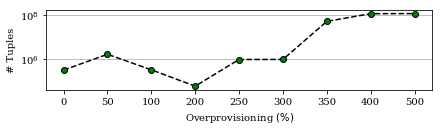

In [18]:
data = {6: {0: [502.0], 100: [299411.0], 40: [667.0], 80: [807.0], 20: [630.0], 60: [701.0]}}

data = {1301: {6: {0: 47657.0, 800: 192886357.0, 100: 35013.0, 200: 46717.0, 400: 108063366.0, 1000: 200249633.0, 50: 45451.0}}}
data = {1301: {6: {0: 47657.0, 800: 192886357.0, 100: 35013.0, 1000: 200249633.0, 400: 108063366.0, 200: 46717.0, 50: 45451.0}}}
data = {6: {0: 47657.0, 800: 192886357.0, 100: 45451.0, 1000: 200249633.0, 400: 108063366.0, 200: 46717.0, 50: 45451.0}}
data = {6: {0: 464815.0, 100: 342099.0, 200: 360686.0, 300: 1891705.0, 400: 109228301.99999999, 50: 1663951.0, 500: 111092052.0, 250: 979299.0, 350: 49896326.0}}
data = {6: {0: 326031.0, 100: 335391.0, 200: 62112.0, 300: 977602.0, 400: 109228301.99999999, 50: 1663951.0, 500: 110615427.0, 250: 970783.0, 350: 49343607.0}}
modes  = [6]

Rs = data[6].keys()
Rs.sort()
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 10


def draw_plots(data):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Rs
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [6.25, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [np.median(data[mode][qid]) for qid in qids]
        
        x = xlab
        
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        
        ctr += 1
   
    plt.xlabel(r'Overprovisioning $(\%)$')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.yaxis.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#               ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_X_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data)


[0, 1, 2, 3, 4, 5] [1, 10, 100, 1000, 5000, 10000]
[0, 1, 2, 3, 4, 5]
6 [0, 1, 2, 3, 4, 5] [1.0, 3.0, 8.0, 14.0, 18.0, 28.0]
[0, 1, 2, 3, 4, 5] [1, 10, 100, 1000, 5000, 10000]


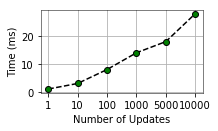

In [399]:
data = {6: {1: [1], 10: [3], 100: [8], 1000: [14], 5000: [18], 10000: [28]}}

modes  = [6]

Rs = data[6].keys()
Rs.sort()
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'Times'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 10


def draw_plots(data):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Rs
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = xlab
    print ticks
    
    for mode in modes:
        y = [np.median(data[mode][qid]) for qid in qids]
        
        x = xlab
        
        print mode, x, y
        #ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        pl.plot(x,y,label=modes_2_labels[mode],color='k',linestyle='--', marker='o', mec='k', mfc='g')
        
        ctr += 1
   
    plt.xlabel('Number of Updates')
    plt.ylabel('Time (ms)')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
#     ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#               ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/micro_updates.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data)


{4: [0.557, 3.734, 3.965, 4.355, 4.635, 5.085, 5.893, 5.986], 6: [0.095, 0.497, 3.781, 0.213, 4.472, 0.478, 0.121, 0.337]}
{4: 'FIXED-REF', 6: 'Sonata'}
4 [4, 6]
6 [4, 6]


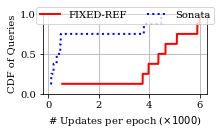

In [204]:
data = {1: {0: {4: [557], 6: [95]}}, 2: {0: {4: [3734], 6: [497]}}, 3: {0: {4: [3965], 6: [3781]}}, 4: {0: {4: [4355], 6: [213]}}, 5: {0: {4: [4635], 6: [4472]}}, 6: {0: {4: [5085], 6: [478]}}, 7: {0: {4: [5893], 6: [121]}}, 8: {0: {4: [5986], 6: [337]}}}

modes = [4,6]
matplotlib.rcParams['font.size']= 10
matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

def get_plot_data(data, modes):
    out = {}
    for qn in data:
        for mode in data[qn][0]:
            if mode not in out:
                out[mode] = []
            tmp = [float(x)/1000 for x in data[qn][0][mode]]
            out[mode]+=tmp
    return out

plot_data = get_plot_data(data, modes)
print plot_data
plotCDF(plot_data, order=[6,4], xlabel=r'# Updates per epoch ($\times 1000$)', ylabel='CDF of Queries', Xmax='N/A', Xmin='N/A', 
        fname='/Users/arpit/Documents/nsdi18/writing/figures/overhead', labels = {4:'FIXED-REF', 6:'Sonata'}, isLog=False)